## Uždavinys 1: Spam ir ne-spam klasifikavimas

Jūs turite el. laiškų rinkinį, kuriame yra paženklinti el. laiškai kaip "spam" arba "ne-spam". Naudokite Naive Bayes algoritmą, kad sukurtumėte modelį, kuris galėtų klasifikuoti naujus el. laiškus.

Naudokite duomenis iš šio šaltinio: https://archive.ics.uci.edu/dataset/228/sms+spam+collection

Įkelkite duomenis ir atlikite išankstinį apdorojimą (aptvarkykite duomenis, pasirinkite tik tai ko jums reikia).
Padalinkite duomenis į mokymosi ir testavimo rinkinius.
Sukurkite Naive Bayes modelį naudojant scikit-learn.
Įvertinkite modelio tikslumą naudodami testavimo rinkinį.

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np


In [36]:
df = pd.read_csv('SMSSpamCollection.csv' , sep='\t', header=None, names=['label', 'message'])
print(df['label'].value_counts())

label
ham     4825
spam     747
Name: count, dtype: int64


In [39]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

print(classification_report(y_test, y_pred,  target_names=['ham', 'spam']))

0.9668161434977578
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       1.00      0.75      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



## Uždavinys 2

Turite Twitter žinutes, kurios yra paženklintos kaip "positive" arba "negative". Naudokite Naive Bayes algoritmą, kad sukurtumėte modelį, kuris galėtų nustatyti naujų žinučių segmentą (ar žinutė yra negative ar positive).

Naudokite duomenis iš šio šaltinio: https://www.kaggle.com/datasets/kazanova/sentiment140

In [40]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding= 'ISO-8859-1',  names= ['target', 'id', 'date', 'flag', 'user', 'text'])
df = df[['target', 'text']]
print(df.head())

df['target'] = df['target'].map({0: 'negative', 4: 'positive'})

print(df['target'].value_counts())

   target                                               text
0       0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1       0  is upset that he can't update his Facebook by ...
2       0  @Kenichan I dived many times for the ball. Man...
3       0    my whole body feels itchy and like its on fire 
4       0  @nationwideclass no, it's not behaving at all....
target
negative    800000
positive    800000
Name: count, dtype: int64


In [45]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)


model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

0.773371875
              precision    recall  f1-score   support

    negative       0.75      0.82      0.78    159494
    positive       0.80      0.73      0.76    160506

    accuracy                           0.77    320000
   macro avg       0.78      0.77      0.77    320000
weighted avg       0.78      0.77      0.77    320000



## Uždavinys 3

Turite vyno kokybės duomenų rinkinį, kur vynai yra paženklinti kaip "gera" arba "bloga" kokybė. Naudokite Naive Bayes algoritmą, kad sukurtumėte modelį, kuris galėtų klasifikuoti vyno kokybę.

Naudokite duomenis iš šio šaltinio: https://archive.ics.uci.edu/dataset/186/wine+quality

In [18]:
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')

red['type'] = 'red'
white['type'] = 'white'

# Sujungiam duomenis
wine_data = pd.concat([red, white])
# print(wine_data)

quality_labels = []
for quality in wine_data['quality']:
    if quality >=6:
        quality_labels.append(1)  #gera kokybe
    else:
        quality_labels.append(0)  #bloga kokybe
wine_data['quality'] = quality_labels

X = wine_data.drop(['quality', 'type'], axis=1)
y = wine_data['quality']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['bloga', 'gera']))

              precision    recall  f1-score   support

       bloga       0.55      0.61      0.58       451
        gera       0.78      0.73      0.76       849

    accuracy                           0.69      1300
   macro avg       0.67      0.67      0.67      1300
weighted avg       0.70      0.69      0.69      1300



## Uždavinys 4

Turite namų kainų duomenų rinkinį, kuriame pateikiamos įvairios savybės (plotas, kambarių skaičius ir t.t.). Naudokite Linear Regression algoritmą, kad sukurtumėte modelį, kuris galėtų prognozuoti namų kainas.

Naudokite duomenis iš šio šaltinio: https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

In [85]:
column_names = [ "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df = pd.read_csv('housing.csv', sep='\s+', names=column_names)
df.head()


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ostap\AppData\Local\Temp\ipykernel_13096\3380092578.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('housing.csv', sep='\s+', names=column_names)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


25.175390536116932


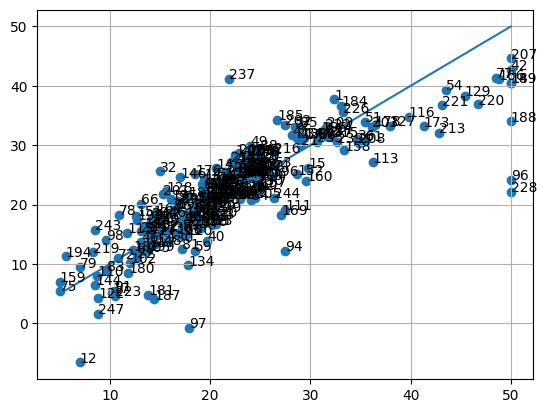

50.0
CRIM         9.2323
ZN           0.0000
INDUS       18.1000
CHAS         0.0000
NOX          0.6310
RM           6.2160
AGE        100.0000
DIS          1.1691
RAD         24.0000
TAX        666.0000
PTRATIO     20.2000
B          366.1500
LSTAT        9.5300
Name: 371, dtype: float64


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [86]:
X = df.drop(columns=['MEDV'])
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# print(y_pred)
mse = mean_squared_error(y_pred, y_test)
print(mse)

for i, n in enumerate(range(len(y_test))):
    plt.annotate(n, (y_test.iloc[i], y_pred[i]))

plt.scatter(y_test, y_pred)
# plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()])
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.grid()
plt.show()

print(y_test.iloc[96])
print(X_test.iloc[96])

df.loc[(df['AGE'] == '100.00') & (df['MEDV'] == '50.00')]

In [87]:
y_pred = model.predict([X.iloc[50]])
X = np.array([[0.57529,   0.00,   6.200,  0 , 0.5070 , 8.3370,  73.30 , 3.8384,   8,  307.0,  17.40, 385.91 ,  2.47]])
y_pred_vilnius = model.predict(X)
print(y_pred_vilnius)

[38.72040847]


c:\Users\ostap\OneDrive\Рабочий стол\Mokymai\Duomenu_mokslas\mokymai\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ostap\OneDrive\Рабочий стол\Mokymai\Duomenu_mokslas\mokymai\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Uždavinys 5

Turite automobilių savybių duomenų rinkinį (variklio dydis, svoris, ir t.t.), pagal kurį turite prognozuoti automobilių degalų sąnaudas. Naudokite Linear Regression algoritmą.

Naudokite duomenis iš šio šaltinio: https://archive.ics.uci.edu/dataset/9/auto+mpg

In [88]:
column_names = [ "mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]
df = pd.read_csv('auto-mpg.csv', sep=r'\s+', names=column_names)
df.head()

# Pašalinti įrašus su '?' reikšmėmis iš dataframe
df = df[df['horsepower'] != '?']

# Konvertuoti stulpelį 'horsepower' į float
df['horsepower'] = df['horsepower'].astype(float)

X = df.drop(['mpg', 'car_name'], axis=1)
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse)

10.710864418838366


## Uždavinys 6

Turite studentų savybių duomenų rinkinį (amžius, mokykla, studijų valandos ir t.t.), pagal kurį turite prognozuoti studentų galutinius pažymius.

Naudokite duomenis iš šio šaltinio: https://archive.ics.uci.edu/dataset/320/student+performance

In [94]:
d1=pd.read_csv("student-mat.csv",sep=";")
d2=pd.read_csv("student-por.csv",sep=";")
d3=pd.merge(d1,d2,on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])
d3.drop(['address'], axis = 1)
atitikmenys = {}
for i in d3.columns.values:
    if type(d3[i][0]) == str:
        values = list(d3[i].unique())
        numeriai = range(len(values))
        atitikmenys[i] = list(zip(numeriai, values))
        d3[i] = d3[i].apply(lambda x: values.index(x))

1.0455050099347958


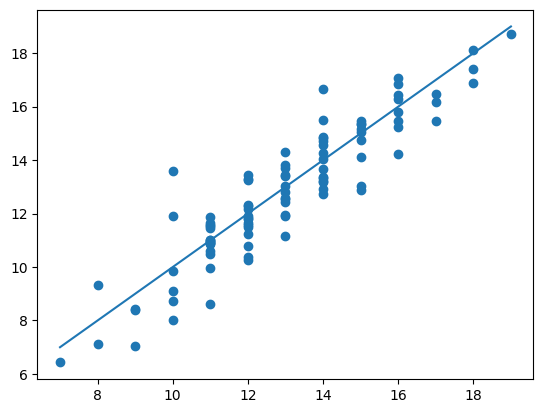

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

target = d3['G3_y']
data = d3.drop('G3_y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
print(mse)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.show()